# Importing libraries

In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import random


from PIL import Image, ImageOps, ImageFilter

# Hyperparameters

In [2]:
ROOT_PATH           = os.getcwd()
REPO_LINK           = 'https://github.com/kottoamatsukami/Smart_Barrier'
REPO_NAME           = REPO_LINK.split('/')[-1]
DATASET_PATH        = os.path.join( ROOT_PATH, 'datasets' )
ORIGINAL_DATASET    = os.path.join( DATASET_PATH, 'Emergency_Vehicles' )
OVERSAMPLED_DATASET = os.path.join( DATASET_PATH, 'oversampled' )
IMAGE_WIDTH         = 224
IMAGE_HEIGHT        = 224

# Downloading the Dataset

In [3]:
os.system(f'git clone {REPO_LINK}')
for object_name in os.listdir( os.path.join( ROOT_PATH, REPO_NAME ) ):
  object_path = os.path.join( ROOT_PATH, REPO_NAME, object_name )
  copy_function = shutil.copytree if os.path.isdir(object_path) else shutil.copy
  try:
    copy_function( src = object_path, dst = os.path.join(ROOT_PATH, object_name) )
  except:
    print(f'The File/Directory[{object_name}] already exists!')
os.system(f'rm -rf ./{REPO_NAME}')

The File/Directory[.git] already exists!
The File/Directory[.idea] already exists!
The File/Directory[datasets] already exists!


1

# Load train and test set

In [4]:
assert os.path.exists( ORIGINAL_DATASET ), 'Something went wrong with original dataset'

In [5]:
def subset_loader(original_path = ORIGINAL_DATASET, label = 'train'):
  csv = pd.read_csv( os.path.join( ORIGINAL_DATASET, f'{label}.csv' ))
  csv['image_names'] = csv['image_names'].apply(
      lambda short_name: os.path.join( ORIGINAL_DATASET, label, short_name )
  )
  if label == 'train':
    csv.columns = [ 'image_path', 'is_emergency' ]
  return csv

In [6]:
train_csv = subset_loader(label = 'train')
test_csv  = subset_loader(label = 'test' )

In [7]:
train_csv.sample(5)

,image_path,is_emergency
1160,C:\Users\meshu\DataspellProjects\Smart_Barrier...,0
424,C:\Users\meshu\DataspellProjects\Smart_Barrier...,0
854,C:\Users\meshu\DataspellProjects\Smart_Barrier...,0
621,C:\Users\meshu\DataspellProjects\Smart_Barrier...,0
952,C:\Users\meshu\DataspellProjects\Smart_Barrier...,1


In [8]:
n = len(train_csv)
num_of_emergency = train_csv['is_emergency'].sum()
print(f"""
Total data length: {n}
is_emergency:      {num_of_emergency}
is_not_emergency:  {n - num_of_emergency}
""")


Total data length: 1646
is_emergency:      681
is_not_emergency:  965


# Augmentation

In [9]:
os.system(f'rm -rf {OVERSAMPLED_DATASET}')
os.mkdir( OVERSAMPLED_DATASET )

In [10]:
index = 0
# Train
for row in train_csv.iterrows():
  image_path, is_emergency = row[1]
  image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
  ##########
  # standart
  ##########
  image.save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # mirror
  ImageOps.mirror(image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # flip
  ImageOps.flip(image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # blur
  image.filter(ImageFilter.BoxBlur(5)).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  ############
  # gray scale
  ############
  gray_image = image.convert("L")
  gray_image.save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # mirror
  ImageOps.mirror(gray_image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # flip
  ImageOps.flip(gray_image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # blur
  gray_image.filter(ImageFilter.BoxBlur(5)).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1

# test
for row in test_csv.iterrows():
  image_path = row[1][0]
  image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
  ##########
  # standart
  ##########
  image.save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  # mirror
  ImageOps.mirror(image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  # flip
  ImageOps.flip(image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  # blur
  image.filter(ImageFilter.BoxBlur(5)).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  ############
  # gray scale
  ############
  gray_image = image.convert("L")
  gray_image.save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  # mirror
  ImageOps.mirror(gray_image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  # flip
  ImageOps.flip(gray_image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1
  # blur
  gray_image.filter(ImageFilter.BoxBlur(5)).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
  )
  index += 1

C:\Users\meshu\AppData\Local\Temp\ipykernel_6696\1837571073.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_path = row[1][0]


In [11]:
len(os.listdir(OVERSAMPLED_DATASET))

18816

# View dataset

In [12]:
def load_and_get_label(image_path):
  image = Image.open(image_path)
  label = 'train' if '_' in image_path else 'test'
  return image, label

In [13]:
images = [
    os.path.join(
        OVERSAMPLED_DATASET,
        random.choice( os.listdir(OVERSAMPLED_DATASET) ))
    for _ in range(25)
]

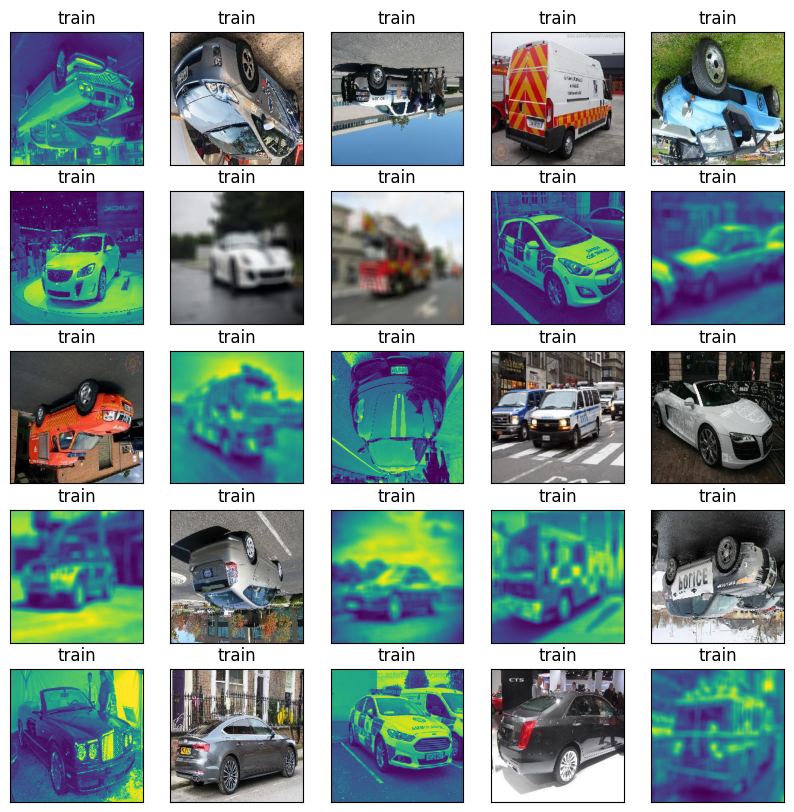

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for row in range(5):
  for col in range(5):
    image, label = load_and_get_label(images[col+row*5])
    axes[row][col].imshow(image)
    axes[row][col].set_title( label )
    axes[row][col].get_xaxis().set_visible( False )
    axes[row][col].get_yaxis().set_visible( False )
plt.show()